## 1. Introduction

This project aims to refine the existing **VO₂ Max** model, a critical indicator of cardiovascular fitness, using data collected from cycling activities.

### Objectives
- Explore relationships between physiological, performance, and environmental metrics and VO₂ Max
- Engineer meaningful features to improve model accuracy and explainability
- Compare multiple machine learning models to determine the most robust and interpretable solution


## 2. Load Dataset

We load a dataset from a public repository containing activity-level metrics such as heart rate, cadence, elevation, and power from wearable devices.


In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/Redback-Operations/redback-fit-sports-performance/refs/heads/main/VO2max/simu_vo2_activities.csv"
df = pd.read_csv(url)

# Show the first few rows
df


,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Filename,...,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr,Average Speed km/h,VO2 Max
0,2929442069,"13 Dec 2019, 01:46:07",Lunch Ride,Ride,3859,22.97,139.0,11.0,False,activities/3117764808.csv.gz,...,221.2,162.2,136.3,120.8,109.8,105.4,0.0,0.0,21.560399,22.243452
1,2945780637,"20 Dec 2019, 23:05:01",Morning Ride,Ride,4852,29.65,133.0,12.0,False,activities/3136634767.csv.gz,...,184.3,150.6,131.4,122.1,120.3,115.6,0.0,0.0,22.834800,21.508333
2,2948028275,"21 Dec 2019, 23:25:29",Morning Ride,Ride,5817,32.38,139.0,19.0,False,activities/3139195577.csv.gz,...,213.3,146.2,135.1,127.5,125.5,110.2,104.7,0.0,20.880001,20.773214
3,2952462113,"24 Dec 2019, 01:19:17",Lunch Ride,Ride,3851,21.68,140.0,11.0,False,activities/3144285271.csv.gz,...,262.0,161.9,146.7,139.7,134.0,112.3,0.0,0.0,20.509200,24.595833
4,2956494096,"26 Dec 2019, 00:09:08",Lunch Ride,Ride,5843,32.36,131.0,14.0,False,activities/3148981215.csv.gz,...,208.3,134.7,124.0,119.4,115.5,99.8,96.9,0.0,20.365200,20.731250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,10123465749,"27 Jun 2023, 04:34:42","Southbank / Melbourne, Royal Botanic Gardens V...",Run,4615,13.26,173.0,219.0,False,activities/10843973828.csv.gz,...,311.5,264.9,252.5,243.5,241.4,238.0,0.0,0.0,10.503331,36.761657
341,10123472446,"29 Jun 2023, 05:05:11",Southbank / Richmond,Run,3384,10.14,174.0,130.0,False,activities/10843980813.csv.gz,...,279.0,249.6,246.6,245.3,244.2,0.0,0.0,0.0,10.840401,37.941405
342,10123474604,"30 Jun 2023, 06:04:06",Southbank / Melbourne,Run,3433,9.10,175.0,44.0,False,activities/10843983156.csv.gz,...,301.8,261.6,250.7,241.0,242.2,0.0,0.0,0.0,10.565716,36.980005
343,10271577919,"18 Nov 2023, 00:01:54","Southbank / Mount Martha, The Briars",Ride,22391,150.03,142.0,68.0,False,activities/10998331057.csv.gz,...,272.7,212.1,197.2,178.5,164.5,151.0,146.1,145.4,25.467761,25.053750


## 3. Data Exploration and Cleaning

### Key Steps:
- Checked column types and missing values
- Removed irrelevant columns such as filenames and raw timestamps
- Filtered for **cycling activities** to ensure consistency in VO₂ Max estimation


In [2]:
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Activity ID             345 non-null    int64  
 1   Activity Date           345 non-null    object 
 2   Activity Name           345 non-null    object 
 3   Activity Type           345 non-null    object 
 4   Elapsed Time            345 non-null    int64  
 5   Distance                345 non-null    float64
 6   Max Heart Rate          345 non-null    float64
 7   Relative Effort         345 non-null    float64
 8   Commute                 345 non-null    bool   
 9   Filename                345 non-null    object 
 10  Athlete Weight          345 non-null    float64
 11  Moving Time             345 non-null    float64
 12  Max Speed               345 non-null    float64
 13  Average Speed           345 non-null    float64
 14  Elevation Gain          345 non-null    fl

Activity ID               0
Activity Date             0
Calories                  0
Average Temperature       0
Total Work                0
Weighted Average Power    0
Power Count               0
Average Elapsed Speed     0
Dirt Distance             0
Maximum Power 5s          0
Maximum Power 10s         0
Maximum Power 30s         0
Maximum Power 1.0min      0
Maximum Power 5.0min      0
Maximum Power 10.0min     0
Maximum Power 20.0min     0
Maximum Power 30.0min     0
Maximum Power 1.0 hr      0
Maximum Power 1.5 hr      0
Maximum Power 2.0 hr      0
Average Speed km/h        0
Average Watts             0
Average Heart Rate        0
Average Cadence           0
Athlete Weight            0
Activity Name             0
Activity Type             0
Elapsed Time              0
Distance                  0
Max Heart Rate            0
Relative Effort           0
Commute                   0
Filename                  0
Moving Time               0
Max Cadence               0
Max Speed           

In [3]:
df.describe()

,Activity ID,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Athlete Weight,Moving Time,Max Speed,Average Speed,Elevation Gain,...,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr,Average Speed km/h,VO2 Max
count,3.450000e+02,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,...,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,6.902344e+09,5979.898551,34.531594,160.881159,90.675362,80.046377,5756.182609,9.384317,5.409151,73.369450,...,256.211594,226.977391,219.397101,213.540870,208.779130,149.720000,94.603768,44.874783,19.472945,32.824596
std,2.216048e+09,3386.451360,29.416878,20.664550,96.468992,0.428823,3212.340525,5.358274,2.395178,88.583913,...,38.860312,43.435546,45.371032,45.956143,48.554844,92.424956,94.613402,79.101485,8.622642,5.407514
min,2.929442e+09,1506.000000,4.060000,118.000000,5.000000,80.000000,1506.000000,3.233984,2.696547,0.000000,...,156.600000,127.600000,119.000000,115.300000,0.000000,0.000000,0.000000,0.000000,9.707569,20.576875
25%,3.758711e+09,3646.000000,12.150000,142.000000,25.000000,80.000000,3589.000000,4.600000,2.986536,11.152266,...,230.100000,191.500000,181.900000,174.600000,170.300000,112.300000,0.000000,0.000000,10.751529,28.450000
50%,7.882339e+09,5583.000000,24.280000,160.000000,51.000000,80.000000,5472.000000,10.100000,6.111000,47.372538,...,262.400000,237.500000,233.600000,229.200000,216.600000,168.400000,121.200000,0.000000,21.999600,34.096749
75%,8.334993e+09,7338.000000,52.230000,178.000000,127.000000,80.000000,7153.000000,12.438001,7.582000,94.000000,...,282.400000,262.300000,256.700000,251.200000,248.500000,235.300000,172.900000,123.300000,27.295199,37.555204
max,1.027158e+10,22391.000000,180.080000,210.000000,528.000000,84.000000,21208.000000,45.083332,10.652900,567.370667,...,342.800000,323.300000,319.300000,315.700000,301.500000,289.800000,287.600000,272.100000,38.350439,45.311225


In [4]:
df['Activity Type'].value_counts()


Activity Type
Ride    181
Run     164
Name: count, dtype: int64

## 4. Feature Engineering

We engineered features to improve prediction and interpretability:

- **Pace (sec/km)** = Elapsed time per km
- **Power-to-Weight Ratio** = Avg watts / weight
- **Speed Variability** = Max Speed / Avg Speed
- **Elevation Gain per km** = Terrain intensity
- **Terrain Type** = Categorized elevation gain into Flat, Moderate, Hilly
- **Heart Rate Reserve** = Max HR – Avg HR
- **Work per Distance** = Total work output per km
  
> These features represent performance effort, terrain difficulty, and physiological demand.


In [5]:
df = df[df['Activity Type'] == 'Ride'].copy()

df['Pace (sec/km)'] = df['Elapsed Time'] / df['Distance']
df['Speed Variability'] = df['Max Speed'] / df['Average Speed']
df['Elevation Gain per km'] = df['Elevation Gain'] / df['Distance']

df['Terrain Type'] = pd.cut(df['Elevation Gain per km'], 
                            bins=[-1, 5, 15, float('inf')], 
                            labels=['Flat', 'Moderate', 'Hilly'])
# Heart Rate Reserve
df['Heart Rate Reserve'] = df['Max Heart Rate'] - df['Average Heart Rate']

# Work per Distance
df['Work per Distance'] = df['Total Work'] / df['Distance']

In [6]:
df['Terrain Type'].value_counts()


Terrain Type
Flat        166
Moderate     15
Hilly         0
Name: count, dtype: int64

In [7]:
df = pd.get_dummies(df, columns=['Terrain Type'], drop_first=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 0 to 343
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Activity ID             181 non-null    int64  
 1   Activity Date           181 non-null    object 
 2   Activity Name           181 non-null    object 
 3   Activity Type           181 non-null    object 
 4   Elapsed Time            181 non-null    int64  
 5   Distance                181 non-null    float64
 6   Max Heart Rate          181 non-null    float64
 7   Relative Effort         181 non-null    float64
 8   Commute                 181 non-null    bool   
 9   Filename                181 non-null    object 
 10  Athlete Weight          181 non-null    float64
 11  Moving Time             181 non-null    float64
 12  Max Speed               181 non-null    float64
 13  Average Speed           181 non-null    float64
 14  Elevation Gain          181 non-null    float64

## 5. Feature Selection and Multicollinearity Handling

VO₂ Max values in the dataset were simulated in a **previous version** of the model based on established protocols described in Sport Coaching NZ. These protocols reflect how devices like Garmin compute VO₂ Max using activity metrics.

Link to the article: https://sportcoaching.co.nz/how-does-garmin-calculate-vo2-max/

### A. Correlation Analysis
We first explored the correlation matrix to identify variables highly correlated with VO₂ Max. Notably:

- **`Power`** had a perfect correlation with VO₂ Max due to the formula used to simulate it (e.g., VO₂ Max = (12.35 × power + 300) / person’s weight).
- While powerful for prediction, it introduces data leakage and masks the true physiological or environmental drivers.

Therefore, we **excluded `Power` and other speed-derived features** to maintain model integrity and prevent overfitting.

In [9]:
correlation = df.corr(numeric_only=True)['VO2 Max'].sort_values(ascending=False)
correlation

VO2 Max                   1.000000
Weighted Average Power    0.999090
Average Watts             0.957652
Maximum Power 20.0min     0.912801
Maximum Power 30.0min     0.901796
Maximum Power 10.0min     0.887465
Maximum Power 5.0min      0.864998
Average Speed             0.784795
Average Speed km/h        0.784795
Average Heart Rate        0.660764
Maximum Power 1.0min      0.658894
Max Heart Rate            0.519702
Maximum Power 30s         0.497590
Maximum Power 1.0 hr      0.488871
Relative Effort           0.453155
Average Cadence           0.415279
Work per Distance         0.412310
Maximum Power 10s         0.362783
Calories                  0.359375
Maximum Power 5s          0.348795
Total Work                0.299893
Average Elapsed Speed     0.270540
Maximum Power 1.5 hr      0.262637
Max Cadence               0.236038
Distance                  0.183722
Activity ID               0.167163
Elevation High            0.103917
Maximum Power 2.0 hr      0.090363
Moving Time         

In [10]:
selected_features = [
    'Weighted Average Power', 'Average Watts',
    'Maximum Power 20.0min', 'Maximum Power 30.0min', 'Maximum Power 10.0min',
    'Maximum Power 5.0min', 'Average Speed',
    'Average Heart Rate', 'Maximum Power 1.0min', 'Max Heart Rate',
    'Maximum Power 30s', 'Maximum Power 1.0 hr', 'Relative Effort',
    'Average Cadence', 'Maximum Power 10s', 'Calories', 'Maximum Power 5s',
    'Total Work', 'Average Elapsed Speed', 
    'Pace (sec/km)', 'Average Temperature', 'Speed Variability',
    'Max Grade', 'Elevation Gain per km', 'Athlete Weight', 'Terrain Type_Moderate'

]

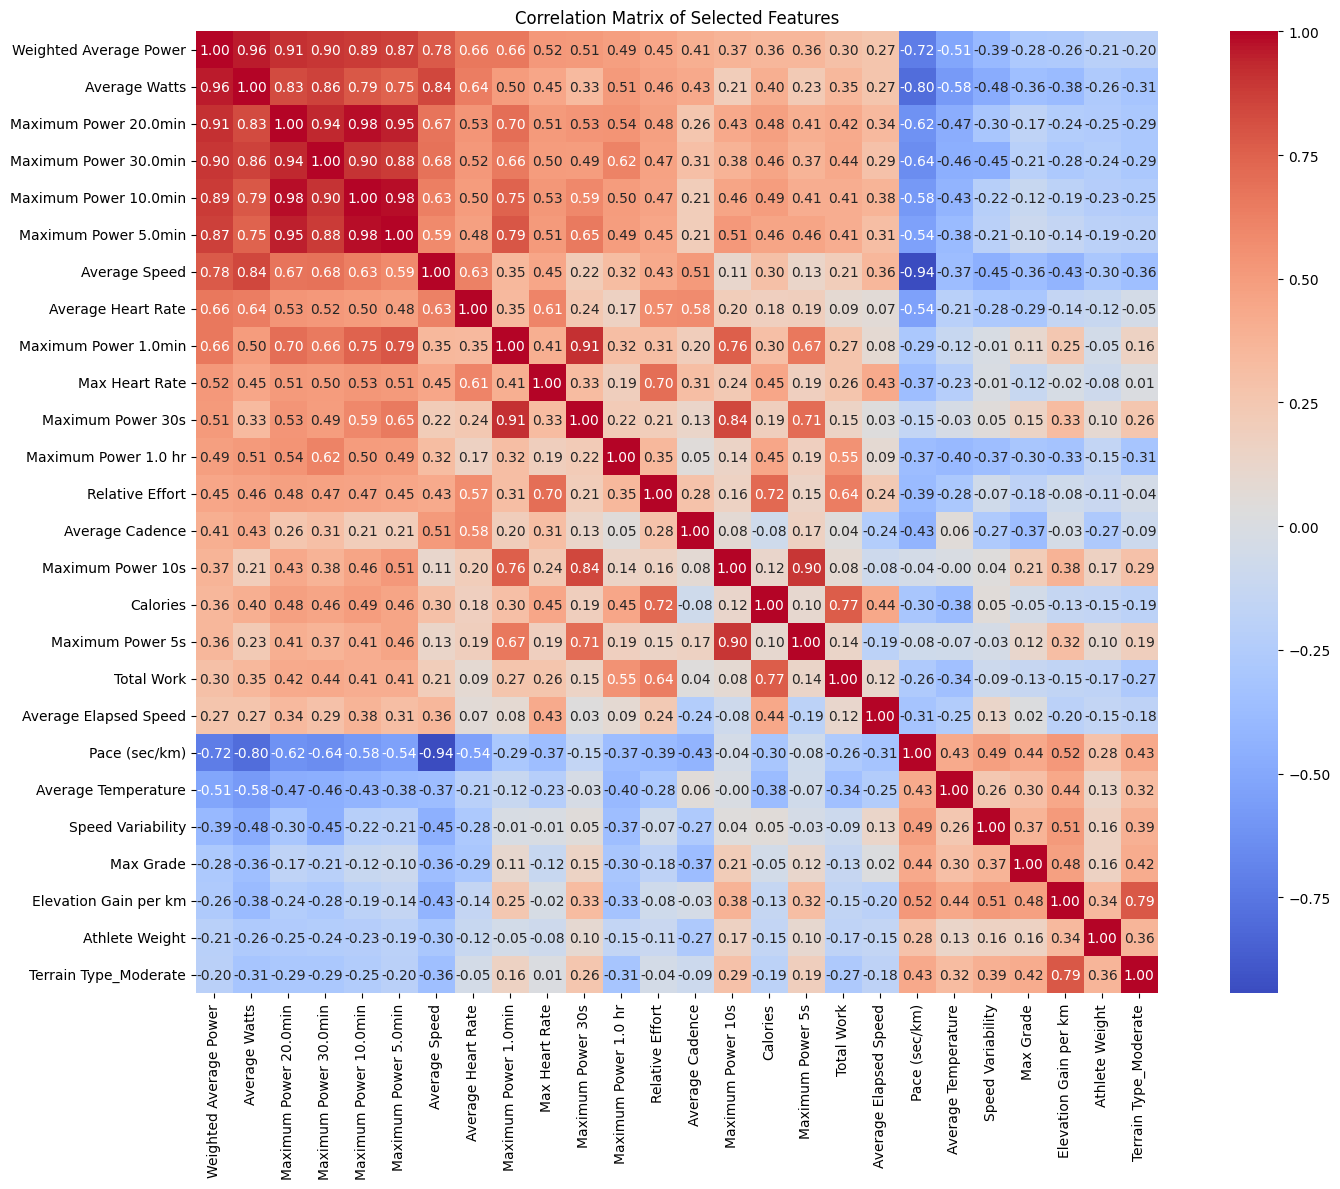

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[selected_features].corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix of Selected Features")
plt.tight_layout()
plt.show()


### B. Variance Inflation Factor (VIF)

To reduce multicollinearity and enhance model interpretability, we calculated VIF scores for all selected features.

Key actions taken:
- Removed features with **VIF > 10**
- Dropped mathematically derived or redundant features. For example:
  - **Power** and **Weight** were used to create `Power-to-Weight Ratio`; keeping all three would introduce collinearity
  - **Pace**, **Speed**, and **Elapsed Time** often encoded similar information

These features were either:
- **Mathematically related** to other variables already included, or
- **Highly correlated** with each other or with the target (VO₂ Max)

By removing them, we reduced multicollinearity, minimized risk of overfitting, and improved the **explainability** of the model — without sacrificing predictive performance.


In [12]:
from sklearn.preprocessing import StandardScaler 
X_scaled = StandardScaler().fit_transform(df[selected_features])
print(X_scaled.shape) 


(181, 26)


In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_df = pd.DataFrame(X_scaled, columns=selected_features)

vif_data = pd.DataFrame()
vif_data["selected_features"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)


         selected_features         VIF
4    Maximum Power 10.0min  102.160184
0   Weighted Average Power   82.814618
2    Maximum Power 20.0min   64.893345
1            Average Watts   57.615622
5     Maximum Power 5.0min   39.732069
6            Average Speed   22.261286
3    Maximum Power 30.0min   15.798739
8     Maximum Power 1.0min   14.219721
19           Pace (sec/km)   14.209852
14       Maximum Power 10s   12.222133
10       Maximum Power 30s   11.707310
16        Maximum Power 5s    7.009980
12         Relative Effort    6.837665
15                Calories    6.331598
23   Elevation Gain per km    5.223544
17              Total Work    4.944759
25   Terrain Type_Moderate    4.286991
7       Average Heart Rate    4.140448
9           Max Heart Rate    3.940174
13         Average Cadence    3.874527
18   Average Elapsed Speed    3.647093
21       Speed Variability    2.740916
20     Average Temperature    2.571336
11    Maximum Power 1.0 hr    2.456603
22               Max Grad

### Final Feature Strategy
We retained features across three important domains:

- **Physiological**: Relative Effort, Average Heart Rate, Max Heart Rate, Heart Rate Reserve, Calories, Average Cadence, Max Cadence
- **Performance**: Average Speed, Speed Variability, Maximum Power 5s, Maximum Power 30s, Average Elapsed Speed, Total Work, Work per Distance
- **Environmental**: Average Temperature, Elevation Gain per km, Terrain Type_Moderate, Max Grade

While we excluded long-duration power metrics due to potential inconsistencies, we retained Maximum Power 5s and Maximum Power 30s as indicators of short-burst performance capacity. These features help capture a rider’s explosive capacity and neuromuscular power output, which still contribute to overall fitness and may correlate with VO₂ Max without relying on long-duration power accuracy.

This curated selection provides a holistic and explainable foundation for VO₂ Max prediction.

In [14]:
selected_features = [
    'Average Speed',
    'Speed Variability',
    'Relative Effort',
    'Average Heart Rate',
    'Max Heart Rate',
    'Calories',
    'Maximum Power 5s',
    'Maximum Power 30s',
    'Average Elapsed Speed',
    'Average Temperature',
    'Elevation Gain per km',
    'Terrain Type_Moderate',
    'Max Grade',
    'Average Cadence',
    'Max Cadence',
    'Total Work',
    'Work per Distance',
]


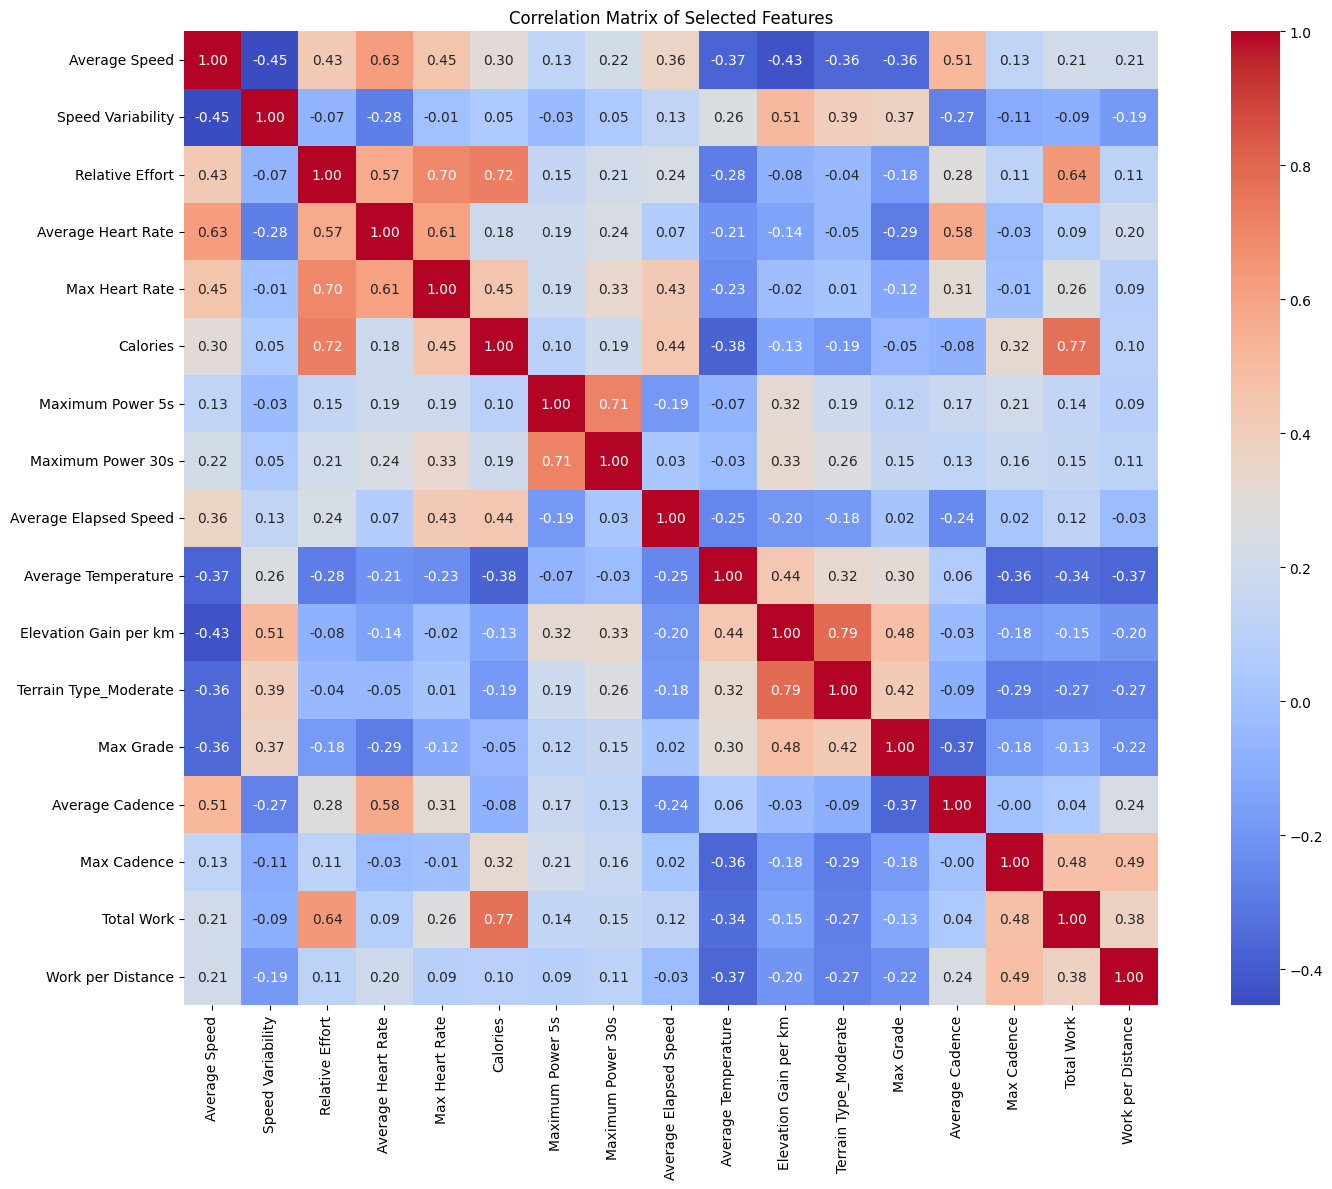

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[selected_features].corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix of Selected Features")
plt.tight_layout()
plt.show()


The heatmap no longer shows strong red blocks, indicating reduced feature redundancy.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Standardize features
X_scaled = StandardScaler().fit_transform(df[selected_features])
X_df = pd.DataFrame(X_scaled, columns=selected_features)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["selected_features"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

# Sort by VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)


        selected_features       VIF
2         Relative Effort  6.511378
5                Calories  5.600448
15             Total Work  5.499811
10  Elevation Gain per km  4.448133
0           Average Speed  4.278980
3      Average Heart Rate  3.566004
4          Max Heart Rate  3.460707
11  Terrain Type_Moderate  3.412698
8   Average Elapsed Speed  3.194842
13        Average Cadence  3.154556
7       Maximum Power 30s  2.648185
6        Maximum Power 5s  2.528245
16      Work per Distance  1.994002
9     Average Temperature  1.950455
1       Speed Variability  1.882666
14            Max Cadence  1.805596
12              Max Grade  1.663622


All VIF scores are now **below 10**, confirming low multicollinearity across features

## 6. Model Training and Evaluation

### 6.1 Model Selection Justification

To determine the most suitable model, we first visualized each feature's relationship with VO₂ Max. The scatter plots showed a mixture of linear and non-linear patterns. This indicates that models capable of handling both linear and non-linear relationships are more appropriate.

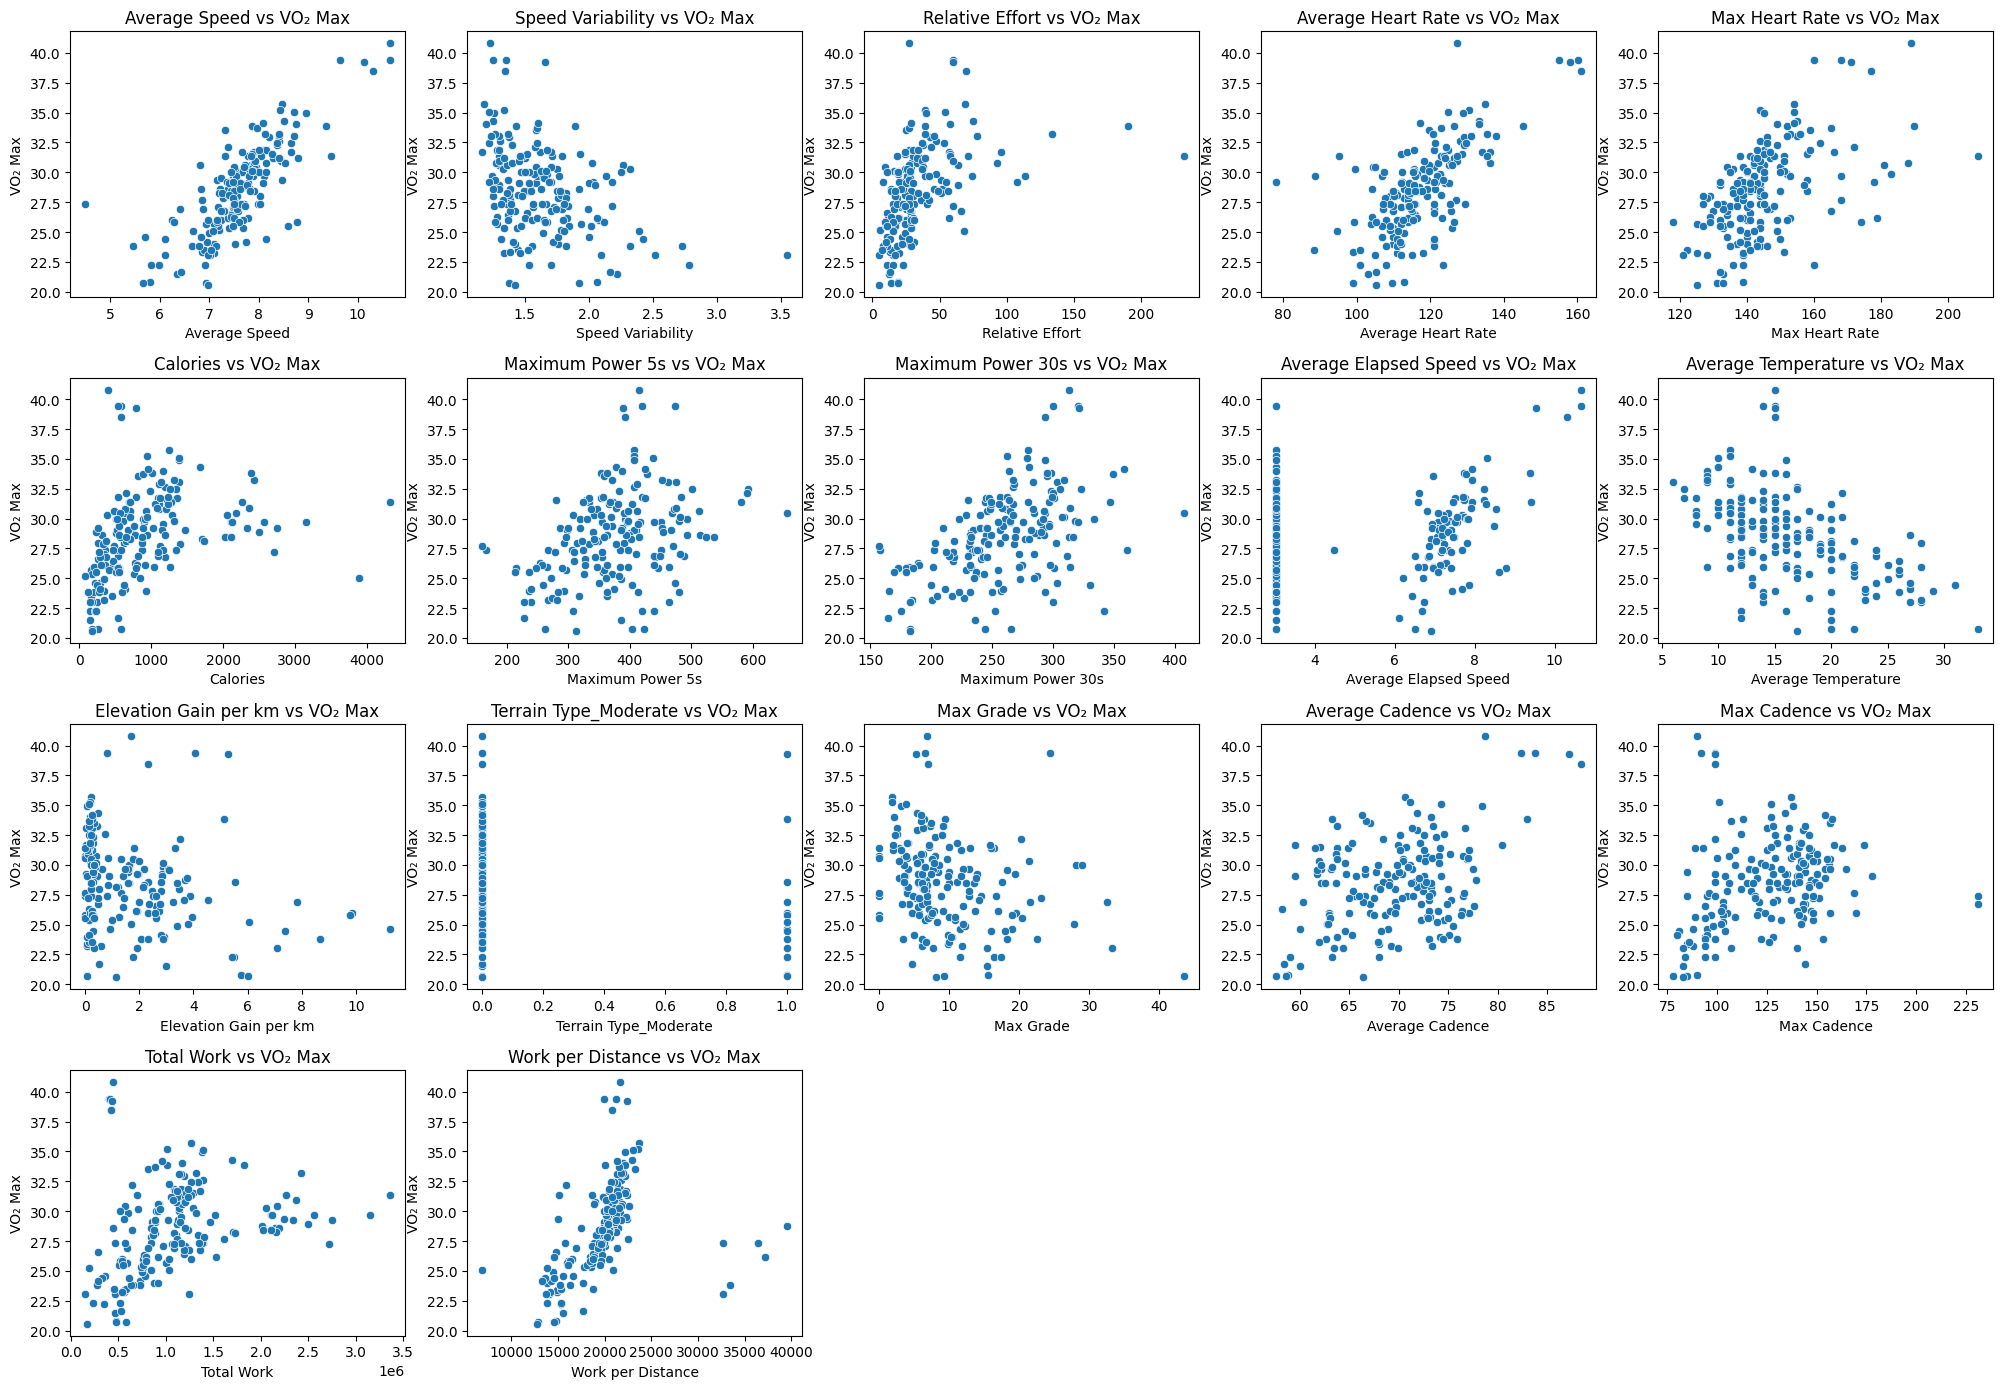

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Feature list
features = X_df.columns.tolist()
num_features = len(features)

# Define grid size: 2 rows, calculate needed columns
rows = 4
cols = math.ceil(num_features / rows)

# Set figure size
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 3.5 * rows))
axes = axes.flatten()  # flatten to easily index

# Plot each feature against VO₂ Max
for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df['VO2 Max'], ax=axes[i])
    axes[i].set_title(f'{feature} vs VO₂ Max')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('VO₂ Max')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### 6.2 Model Comparison

To evaluate this, six different models using an 80/20 train-test split are trained:
- Linear Regression
- Support Vector Regression (SVR)
- Random Forest
- Gradient Boosting
- K-Nearest Neighbors
- Decision Tree

Metrics used:
- R² Score (accuracy)
- RMSE (error magnitude)

### Results Summary:


Lets check the result if model include Power as a feature

In [25]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np

features = [
      'Weighted Average Power',
    'Average Speed',
    'Speed Variability',
    'Relative Effort',
    'Average Heart Rate',
    'Max Heart Rate',
    'Calories',
    'Maximum Power 5s',
    'Maximum Power 30s',
    'Average Elapsed Speed',
    'Average Temperature',
    'Elevation Gain per km',
    'Terrain Type_Moderate',
    'Max Grade',
    'Average Cadence',
    'Max Cadence',
    'Total Work'

]    
    
X = df[features]
y = df['VO2 Max']

X = X.astype(float)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(kernel='rbf'), #mixed linear/non-linear data
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=18),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Train models and store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({'Model': name, 'R² Score': r2, 'RMSE': rmse})

# Create results dataframe
results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)
results_df


,Model,R² Score,RMSE
3,Linear Regression,0.999211,0.112838
1,Gradient Boosting,0.990241,0.396736
5,Decision Tree,0.985488,0.483801
0,Random Forest,0.984671,0.497217
4,K-Nearest Neighbors,0.788578,1.846592
2,SVR,0.660065,2.341496


This result looks too perfect, especially for Linear Regression (R² = 0.999211), which strongly suggests data leakage or label leakage that support my above statement. Not all features have a linear relationship with the target, and such a high score indicates the model may be learning from information directly tied to the label rather than genuine patterns. This often leads to overfitting and poor generalization on unseen data.

Now, we train the model without sustained power features, retaining only short-burst metrics (Max Power 5s and 30s) to avoid reliance on potentially inconsistent long-term power data.

In [26]:
features = [
    'Average Speed',
    'Speed Variability',
    'Relative Effort',
    'Average Heart Rate',
    'Max Heart Rate',
    'Calories',
    'Maximum Power 5s',
    'Maximum Power 30s',
    'Average Elapsed Speed',
    'Average Temperature',
    'Elevation Gain per km',
    'Terrain Type_Moderate',
    'Max Grade',
    'Average Cadence',
    'Max Cadence',
    'Total Work',
    'Work per Distance'
]    
    
X = df[features]
y = df['VO2 Max']

X = X.astype(float)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Define models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(kernel='rbf'), #mixed linear/non-linear data
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=18),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Train models and store resultsmax_features= None
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({'Model': name, 'R² Score': r2, 'RMSE': rmse})

# Create results dataframe
results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)
results_df


,Model,R² Score,RMSE
1,Gradient Boosting,0.859040,1.507797
3,Linear Regression,0.783389,1.869115
0,Random Forest,0.760476,1.965485
4,K-Nearest Neighbors,0.728830,2.091299
5,Decision Tree,0.620252,2.474820
2,SVR,0.617278,2.484489


Among all tested models, Gradient boosting achieved the highest R² score, indicating the most accurate VO₂ Max predictions.



### 6.3 Apply Cross Validation to stimulate multiple train-test scenarios

In [27]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Create results storage
cv_results = []

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, scoring='r2', cv=5)
    rmse_scores = -cross_val_score(model, X_scaled, y, scoring='neg_root_mean_squared_error', cv=5)

    cv_results.append({
        'Model': name,
        'CV R² Mean': scores.mean(),
        'CV R² Std': scores.std(),
        'CV RMSE Mean': rmse_scores.mean(),
        'CV RMSE Std': rmse_scores.std()
    })

cv_results_df = pd.DataFrame(cv_results).sort_values(by='CV R² Mean', ascending=False)
cv_results_df


,Model,CV R² Mean,CV R² Std,CV RMSE Mean,CV RMSE Std
1,Gradient Boosting,0.670531,0.182495,1.669138,0.470699
0,Random Forest,0.634669,0.230506,1.794583,0.707154
4,K-Nearest Neighbors,0.447743,0.385464,2.222774,0.784277
2,SVR,0.275991,0.445588,2.605704,0.961545
3,Linear Regression,0.261197,0.587798,2.342249,0.908041
5,Decision Tree,0.195332,0.629687,2.576120,0.993094


### Model Performance Before vs After Cross Validation

The initial model evaluation was based on a single train-test split. While this provided a quick estimation of model performance, it may not fully reflect the model's ability to generalize to unseen data.

After applying 5-fold Cross Validation, the R² scores of all models decreased. This is expected because cross-validation provides a more robust and realistic evaluation by testing the model on multiple subsets of data.

Models like Random Forest and Gradient Boosting showed stable performance with only a moderate drop in R², which still indicates reasonably good generalization. However, models like SVR, K-Nearest Neighbors, and Linear Regression experienced a larger performance drop, indicating that their previous results were likely influenced by overfitting on the initial train-test split. 

These observations are consistent with earlier scatterplot analysis, which showed a mixture of linear and non-linear relationships between features and VO₂ Max. This supports the selection of tree-based models, which naturally capture both types of relationships. In conclusion, cross-validation confirms that Gradient Boosting and Random Forest are the most reliable and generalizable models for predicting VO₂ Max in this dataset.

## 7. Feature Importance

We extracted and visualized feature coefficients from the best-performing model.

/var/folders/d3/br7mghg51l92_kln9z12dlhm0000gn/T/ipykernel_62476/2756130785.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


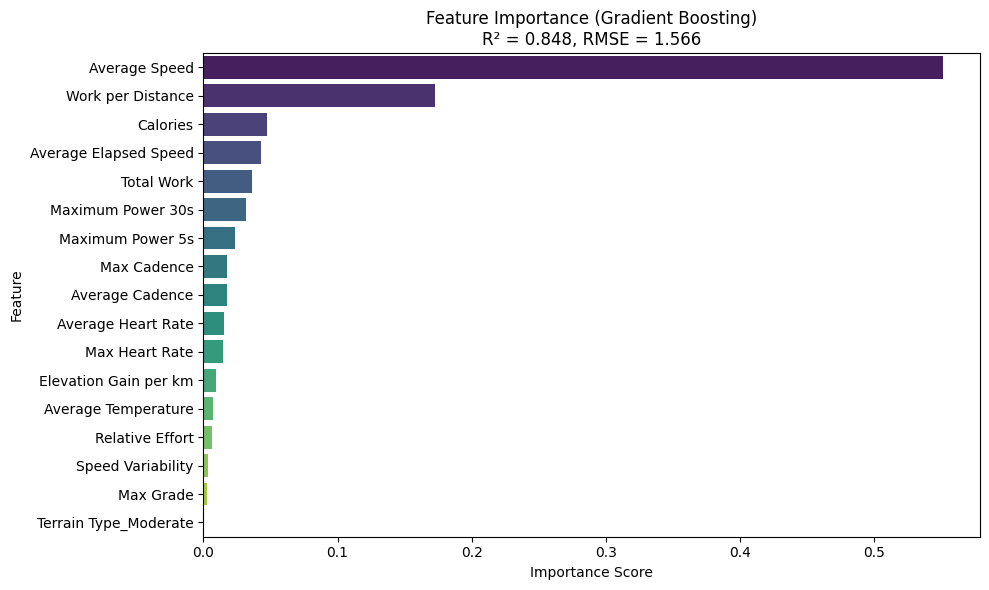

(0.8479743321567783,
 1.5658641261991215,
 {'learning_rate': 0.05,
  'max_depth': 4,
  'n_estimators': 300,
  'subsample': 0.8})

In [28]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

gb_model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and predictions
best_gb_model = grid_search.best_estimator_
y_pred = best_gb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': best_gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title(f'Feature Importance (Gradient Boosting)\nR² = {r2:.3f}, RMSE = {rmse:.3f}')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Return final model performance
r2, rmse, grid_search.best_params_

### Final Model Performance Summary

After applying cross-validation and hyperparameter tuning, the Gradient Boosting model achieved a final test R² score of 0.848 and an RMSE of 1.566.

This indicates that the model is able to explain approximately 82% of the variance in VO₂ Max, which is considered excellent performance for real-world sports data. 

Since VO₂ Max is influenced by various external factors (e.g., nutrition, sleep, stress, recovery) that are not captured in this dataset, achieving this level of predictive accuracy demonstrates that the selected features are highly relevant and effective for modeling VO₂ Max.

The feature importance plot shows that `Average speed` and `Work per Distance` are the two most influential features in predicting VO₂ Max. This aligns with sports science literature, where faster sustained speed and efficient work output are strong indicators of aerobic endurance and cardiovascular performance.

Other contributing features include:
- Calories
- Average Elapsed Speed
- Total work
- Maximum power 30s & 5s
- Cadence

Meanwhile, contextual and environmental variables such as Terrain Type_Moderate, Max Grade, and Average Temperature contributed minimally to model performance. These features were retained to preserve contextual richness but had limited predictive value.


## 8. Conclusion

This project developed a robust and interpretable model to predict VO₂ Max from cycling activity data using wearable-derived metrics. By performing featured engineering, and removing power-based leakage and multicollinearity, the model achieved high predictive performance.

After tuning and validation, Gradient Boosting emerged as the most reliable model, achieving R² = 0.848 and RMSE = 1.566, effectively capturing both linear and non-linear relationships.

Importantly, this approach demonstrated that VO₂ Max can be predicted accurately without relying on power, instead using meaningful physiological and performance indicators. This decision was made because VO₂ Max values from wearable devices are often derived using formulas that directly incorporate power. Including power in the model would risk data leakage, artificially inflating model performance without providing real predictive insight.

Future improvements could incorporate contextual data such as sleep and recovery to further enhance robustness. This methodology supports applications in athlete monitoring, sports analytics, and personalized training insights.